# Dimensionality Reduction for Unsupervised Learning

In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import to dataframe
df_features = pd.read_csv('processed_hotel_bookings.csv')

## Final Dimensionality Reduction Configuration

#### Notes on Methodology

The dataset is quite large, with nearly 40,000 rows. t-SNE rens quite slow, over six minutes if nothing is done to speed it up. 

I am only using eight features for the models. When I ran PCA first and feed it into the t-SNE to speed it up, it would either produce very "stringy" clusters or inferior cluster to grouping to just the normal t-SNE clustering. This can be seen in the alternate dimensionality reduction notebook.

I feel it would work better if there were a lot of features, instead of just eight.

I want to run the Dimensionality Reduction and the Clustering algorithms on as much of the data as I can, but I encountered memory errors when trying to do to much in one notebook. 

Later on, I found that even while running the clustering algorithms on a very reduced number of rows (often less that 20% of the original data), and further reducing that data via t-SNE dimensionality reduction, memory errors persisted.

Since it would not be proper to compare the performance of models run on different portions and slices of the data. I decided to reduce the data down to a random slice of 5% of the data, to be used for all of the models.

I will then scale up the best-performing model as high as the memory errors will permit.

In [3]:
#Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [4]:
# Loading the data
X = df_features
y = df_features.is_canceled

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_norm = normalize(X_std)

### t-SNE

In [5]:
from sklearn.manifold import TSNE
import time

In [6]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.688s...
[t-SNE] Computed neighbors for 39568 samples in 16.696s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

In the figure below, red shows the bookings that were not canceled, and blue shows the bookings that were.

In [7]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Elaboration of t_SNE configuration decision

# Dimensionality Reduction

Here we can see the clusters steadily become more distinct and the KL divergence value steadily go up. I selected a perplexity of 100 because it performed best in terms of the KL divergence and my visual judgement of the clusters.

t-SNE

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.899s...
[t-SNE] Computed neighbors for 39568 samples in 5.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for sam

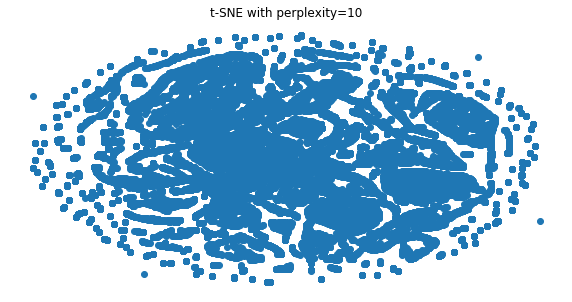

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.648s...
[t-SNE] Computed neighbors for 39568 samples in 8.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for sam

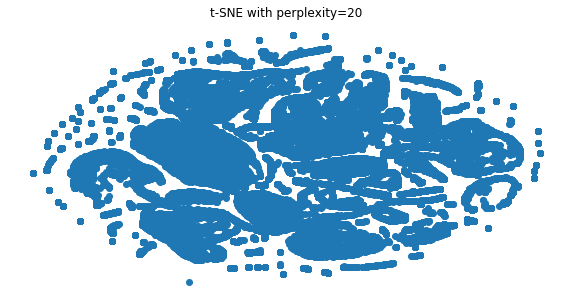

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.731s...
[t-SNE] Computed neighbors for 39568 samples in 8.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for sam

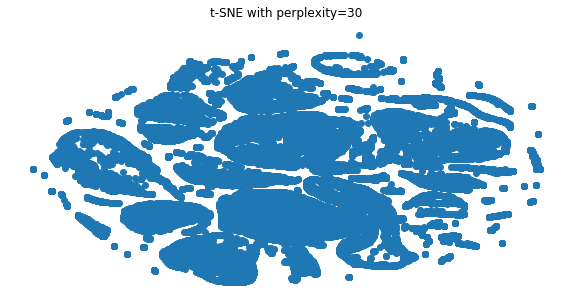

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.613s...
[t-SNE] Computed neighbors for 39568 samples in 9.564s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for sa

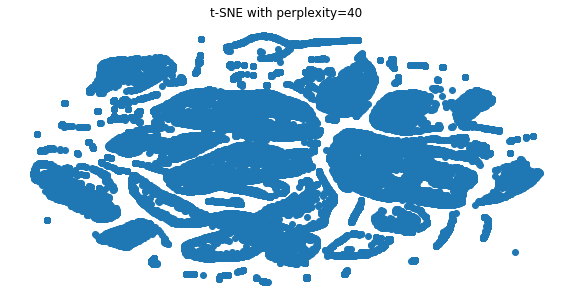

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.620s...
[t-SNE] Computed neighbors for 39568 samples in 10.656s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

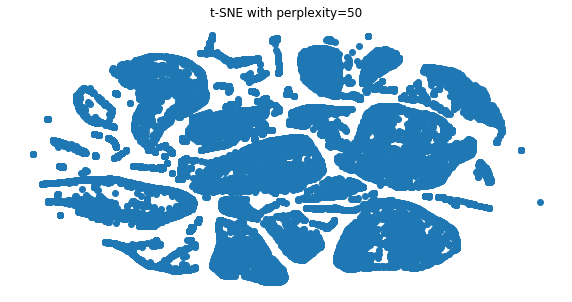

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.601s...
[t-SNE] Computed neighbors for 39568 samples in 11.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

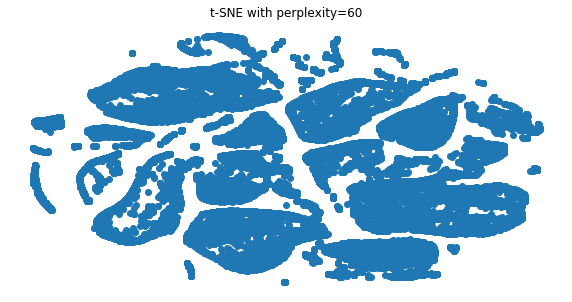

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.605s...
[t-SNE] Computed neighbors for 39568 samples in 12.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

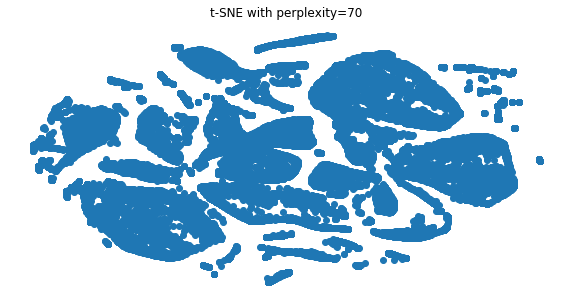

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.616s...
[t-SNE] Computed neighbors for 39568 samples in 13.914s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

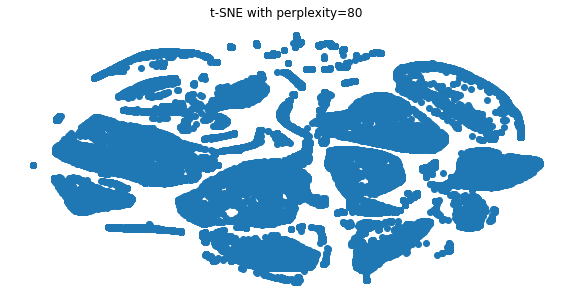

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.641s...
[t-SNE] Computed neighbors for 39568 samples in 15.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

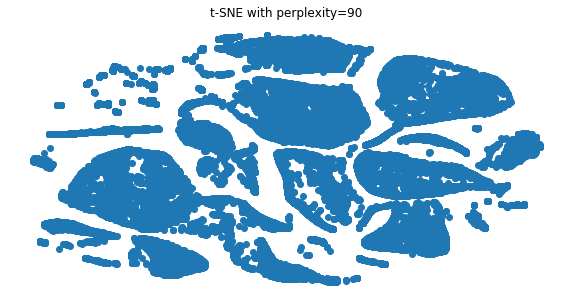

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 39568 samples in 0.604s...
[t-SNE] Computed neighbors for 39568 samples in 15.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39568
[t-SNE] Computed conditional probabilities for sample 2000 / 39568
[t-SNE] Computed conditional probabilities for sample 3000 / 39568
[t-SNE] Computed conditional probabilities for sample 4000 / 39568
[t-SNE] Computed conditional probabilities for sample 5000 / 39568
[t-SNE] Computed conditional probabilities for sample 6000 / 39568
[t-SNE] Computed conditional probabilities for sample 7000 / 39568
[t-SNE] Computed conditional probabilities for sample 8000 / 39568
[t-SNE] Computed conditional probabilities for sample 9000 / 39568
[t-SNE] Computed conditional probabilities for sample 10000 / 39568
[t-SNE] Computed conditional probabilities for sample 11000 / 39568
[t-SNE] Computed conditional probabilities for sample 12000 / 39568
[t-SNE] Computed conditional probabilities for s

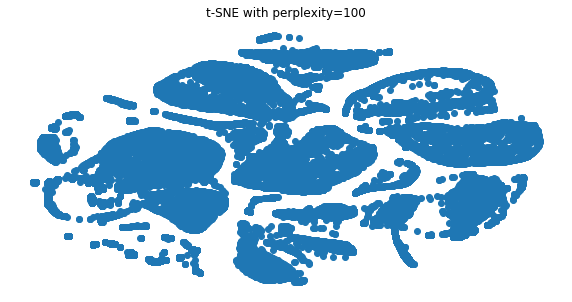

In [8]:
for i in range(10,110,10):
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    plt.figure(figsize=(10,5))
    plt.title("t-SNE with perplexity={}".format(i))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

UMAP

In [9]:
from sklearn.datasets import fetch_openml
import umap

In [10]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
#UMAP is not working, will discuss and troubleshoot with mentor, 

In [ ]:
#Now that I have selected the optimum dimensiionality reduction hyperparameters, I will reduce the data to a size that all
#of the clustering algorithms will be able to run.
df_features_reduced = df_features.sample(frac=0.05, random_state = 885)

In [ ]:
df_featues_reduced.to_csv('reduced_processed_hotel_bookings.csv')